## <b> $ \color{blue}{\text {Welcome!: Introduction to Python for Data Visualization with Jupyter Notebooks!} } $ </b>
***
#### $\color{purple}{\text{Course details: 34:816:656 ||||||| Rutgers University ||||||| E. J. Bloustein School}}$
***
+ Master of Public Informatics Program: https://bloustein.rutgers.edu/graduate/public-informatics/mpi/
+ Informatics graduate certificate: https://bloustein.rutgers.edu/graduate/public-informatics/mpi/certificate/
+ Join us on LinkedIn for the latest updates on MPI, informatics, DS and AI: https://www.linkedin.com/company/rutgers-masters-in-public-informatics/
+ PISG Student group for informatics / analytics / AI: https://bloustein.rutgers.edu/students/organizations/pisg/
***


+ <b> Industry updates [@ Jim Samuel](https://twitter.com/jimsamuel/) ---- <b> https://twitter.com/jimsamuel/ </b>
***


#### Notes & More resources
+ This notebook is collection of foundational instructions from multiple unlisted sources
+ If you click on "Help" in the toolbar, there is a list of references for common Python tools, e.g. numpy, pandas.
+ [IPython website](https://ipython.org/) |||||||
+ [Markdown basics](https://daringfireball.net/projects/markdown/) |||||||
+ [Jupyter Notebook Documentation](https://jupyter-notebook.readthedocs.io/en/stable/index.html) |||||||
+ [Real Python Jupyter Tutorial](https://realpython.com/jupyter-notebook-introduction/) |||||||
+ [Dataquest Jupyter Notebook Tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) |||||||
+ [Stack Overflow](https://stackoverflow.com/) |||||||

<div class="alert alert-info">
    
We support and continue to contribute to open-source code and resources BUT the contents of this for-credit and graded course are protected for ethical reasons and course integrity. Beyond use within this course, none of the course materials developed for this course may be copied, reproduced, re-published, uploaded, posted, transmitted, or distributed in any way without written authorization from the concerned faculty /authors.    
### Copyright Statement: All rights reserved.
* The contents (Jupyter notebooks, Assignments, Exams and other developed materials) presented in this course have been carefully prepared to benefit students enrolled in this course.
* <b> Therefore, for the benefit of future students and course integrity,  PLEASE DO NOT SHARE OR DISSEMINATE </b> any of these materials outside of this class so that the learning experience of future students remains unique and valuable.  
    * <b> Please do not post these materials to GitHub or to any other platform or website. </b>
    * When / If using Google Colab, pls. ensure that the file is not set up for public access (default expected setting is private).
    
</div>

***

<div class="alert alert-info">
    
### Notebook 6: Intermediate Data Visualization - 3

<ul type="1">
<li> In this Module, we will study numerous plots critical for informatics, data science and analytics professionals: Bubble plots, heat maps, dendograms, radar chart /spider plot and circular (exploding) bar charts.</li>

</ul>
</div>

### Bubble Plot

A bubble chart is a scatter plot to show correlation between data in which a third dimension of the data is shown through the size of circles/markers. Color can add another dimension - best for a categorical variable, such as 'name of country'.

Setting Marker Size and Color

In [ ]:
import plotly.graph_objects as go
from plotly.colors import n_colors
import numpy as np
np.random.seed(497)

fig = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100],
    )
)])
fig.update_layout(title_text='Bubble Plot with 4-variables info.: X, Y, Size & Color!', title_x=0.5,
                  xaxis_title="X Axis Title", yaxis_title="Y Axis Title" )
fig.show()

Using everything on [gapminder](https://www.gapminder.org/data/) dataset to plot life expectancy of different countries categorized by continent.

In [ ]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.update_layout(title_text='Bubble Plot', title_x=0.5)
fig.show()

We can use 'facet_col' argument for separate continent visualizataion.

In [ ]:
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60, facet_col='continent')
fig.update_layout(title_text='Multiple Bubble Plots', title_x=0.5)
fig.show()

### Heat Map

The heap map ususally refers to a graphical representation where the data is visualized as matrix of colored tiles and is primarily used to show correlation between data. Example:

In [ ]:
import plotly.express as px

z = [[.1, .3, .5, .7, .9],
     [1, .8, .6, .4, .2],
     [.2, 0, .5, .7, .9],
     [.9, .8, .4, .2, 0],
     [.3, .4, .5, .7, 1]]

fig = px.imshow(z, text_auto=True)
fig.update_layout(title_text='Heat Map', title_x=0.5)
fig.show()

We can also use the seaborn library for creating heatmaps and relations among different data attributes. Example of heatmap showing number of passengers through years:

<ipython-input-5-960de9e9bd00>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



Text(0.5, 1.0, 'Heat Map')

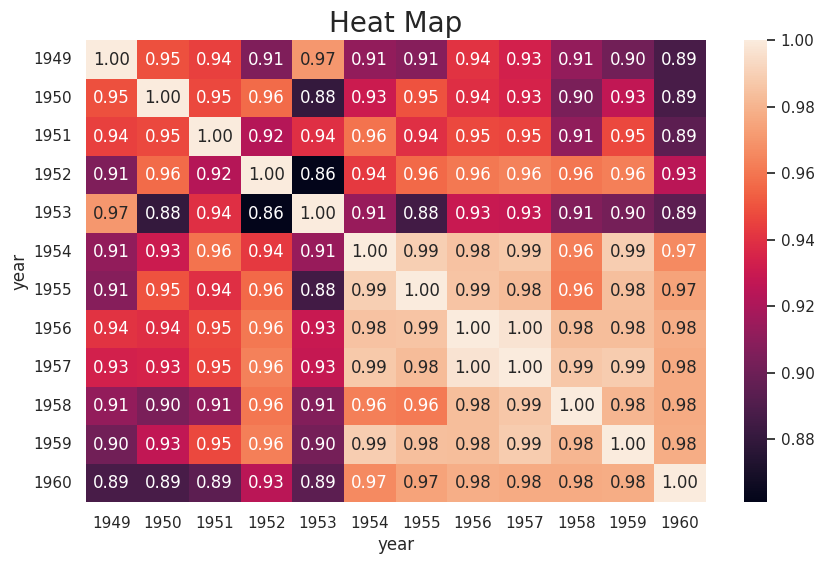

In [ ]:
import seaborn as sns

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

sns.set(rc = {'figure.figsize':(10,6)})

# Note: you can calculate the relation between different attributes using '.corr()' after your data variable
ax = sns.heatmap(flights.corr(), annot=True, fmt = ".2f")
ax.set_title("Heat Map", fontsize=20)

We can also show the numeric value of each cell:

Text(0.5, 1.0, 'Heat Map')

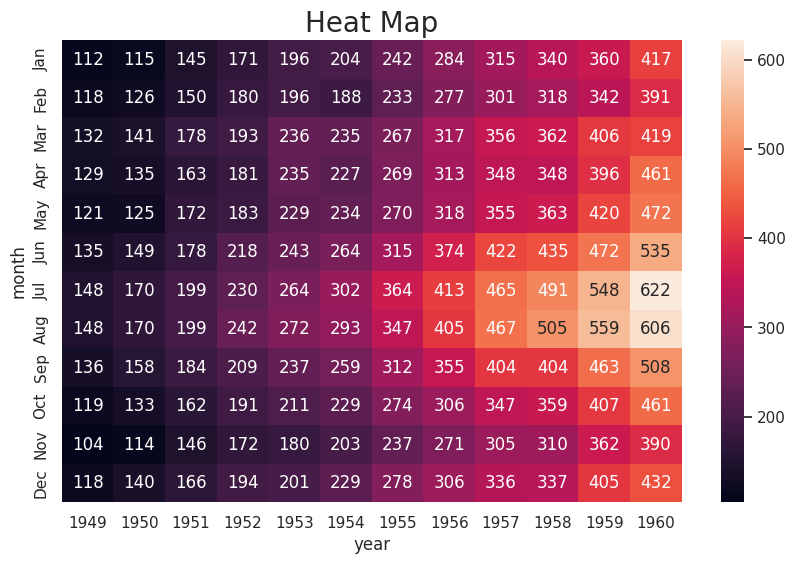

In [ ]:
ax = sns.heatmap(flights, annot=True, fmt="d")
ax.set_title('Heat Map', fontsize=20)

### Radar Chart/ Spider Plot

A Radar Chart/ Spider Plot displays multivariate data in the form of a two-dimensional chart of quantitative variables represented on axes originating from the center. The relative position and angle of the axes is typically uninformative. It is used when we have to compare the values of different variables.

In [ ]:
import pandas as pd
df = pd.DataFrame(dict(
    r=[4, 5, 6, 1, 8],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True, title='Spider Plot')
fig.update_traces(fill='toself')
#fig.update_layout(title_text='Spider Plot', title_x=0.5)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Circular Bar Plot

A circular barplot is pretty much the same as a barplot, but using polar coordinates instead of cartesian coordinates. Lets see an example on a dataset, which contain wind direction, its frequency and strength.

In [ ]:
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength", template="seaborn",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.update_layout(title_text='Circular Bar Plot', title_x=0.5)
fig.show()

### Dendrogram Plot

A dendrogram uses a tree structure. The inbuilt function performs hierarchical clustering on data and represents the resulting tree. Values on the tree depth axis correspond to distances between clusters.

In [ ]:
import plotly.figure_factory as ff

X = np.random.rand(15, 12) # 15 samples, with 12 dimensions each
fig = ff.create_dendrogram(X)
fig.update_layout(title_text='Dendrogram', title_x=0.5,width=800, height=500)
fig.show()